(implicit-rz-section)=
# Stability functions of implicit methods

The simplest implicit method for solving ODEs is the implicit Euler method (also known as the backward Euler method) which is

\begin{align*}
    y_{n+1} =y_n + hf(t_{n+1}, y_{n+1}).
\end{align*}

Applying this to solve the test equation $y' = \lambda y$ and rearranging gives

\begin{align*}
    y_{n+1} &=y_n + h \lambda y_{n+1} \\
    (1 - h\lambda ) y_{n+1} &=y_n \\
    y_{n+1} &=\left( \frac{1}{1 - h\lambda} \right) y_n.
\end{align*}

Let $z = h\lambda$ then the stability function for the implicit Euler method is 

\begin{align*}
    R(z)=\frac{1}{1-z}.
\end{align*}

So here the stability function is a ration fraction which is the case for all implicit methods so we write

\begin{align*}
    R(z) = \frac{P(z)}{Q(z)}.
\end{align*}

The region of absolute stability of the implicit Euler method has been plotted in {numref}`euler-stability-region-figure`. Note that the region of absolute stability includes all of the complex plane with the exception of the unshaded region which means the interval of absolute stability is $h\lambda \in [-\infty, 0]$ so the method is stable for all values of $h$ when solving the test equation $y'= \lambda y$ (this is known as [A-stability](a-stability-definition)).

```{glue:figure} euler_stability_region_plot
:name: euler-stability-region-figure
Region of absolute stability for the implicit Euler method.
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate z values
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = X + Y * 1j

# Define stability functions
Euler = 1 / (1 - Z)

# Plot stability region
fig = plt.figure(figsize=(8, 6))
plt.contourf(X, Y, abs(Euler), levels=[0, 1], colors="#99ccff")
plt.contour(X, Y, abs(Euler), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=2)
plt.axvline(0, color="k", linewidth=2)
plt.axis("equal")
plt.axis([-2, 3, -1.5, 1.5])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.show()

from myst_nb import glue
glue("euler_stability_region_plot", fig, display=False)

ModuleNotFoundError: No module named 'numpy'

## Stability functions for an implicit Runge-Kutta method

To determine the stability function for an implicit Runge-Kutta method we consider the stability function of a general Runge-Kutta method given in equations {eq}`rk-stability-Y-equation` and {eq}`rk-stability-yn+1-equation`

\begin{align*}
    y_{n+1} & = y_n + z \mathbf{b}^\mathrm{T} Y, \\
    Y &= \mathbf{e} y_n + z A Y.
\end{align*}

Rewriting these gives 

\begin{align*}
    y_{n+1} - z \mathbf{b}^\mathrm{T} Y &= y_n \\
    (I - z A) Y &= \mathbf{e}y_n. 
\end{align*}

We can write these as a matrix equation

\begin{align*}
    \begin{pmatrix}
        1 & -z b_1  & -z b_2  & \cdots  & -z b_s \\
        0 & 1-z a_{11}  & -z a_{12}  & \cdots  & -z a_{1s} \\
        0 & -z a_{21}  & 1-z a_{22}  & \cdots  & -z a_{2s} \\
        0 & \vdots  & \vdots  & \ddots  & \vdots \\
        0 & -z a_{s1}  & -z a_{s2}  & \cdots  & 1-z a_{ss} 
    \end{pmatrix}
    \begin{pmatrix} y_{n+1} \\ Y_1 \\ Y_2 \\ \vdots \\ Y_s  \end{pmatrix}=
    \begin{pmatrix} y_n \\ y_n \\ y_n \\ \vdots \\ y_n \end{pmatrix}.
\end{align*}

Using [Cramer's rule](https://en.wikipedia.org/wiki/Cramer%27s_rule) to solve this system for $y_{n+1}$ we have

\begin{align*}
    y_{n+1} = \frac{\det 
    \begin{pmatrix}
        y_n  & -zb_1  & -zb_2  & \cdots  & -zb_s \\
        y_n  & 1-za_{11}  & -za_{12}  & \cdots  & -za_{1s} \\
        y_n  & -za_{21}  & 1-za_{22}  & \cdots  & -za_{2s} \\
        y_n  & \vdots  & \vdots  & \ddots  & \vdots \\
        y_n  & -za_{s1}  & -za_{s2}  & \cdots  & 1-za_{ss} 
    \end{pmatrix}}{\det (I-zA)}.
\end{align*}

Performing a row operation of subtracting the first row of matrix from all other rows gives

\begin{align*}
    y_{n+1} =\frac{\det 
    \begin{pmatrix}
        y_n  & -zb_1  & -zb_2  & \cdots  & -zb_s \\
        0 & 1-za_{11} +zb_1  & -za_{12} +zb_2  & \cdots  & -za_{1s} +zb_s \\
        0 & -za_{21} +zb_1  & 1-za_{22} +zb_2  & \cdots  & -za_{2s} +zb_s \\
        0 & \vdots  & \vdots  & \ddots  & \vdots \\
        0 & -za_{s1} +zb_1  & -za_{s2} +zb_2  & \cdots  & 1-za_{ss} +zb_s 
    \end{pmatrix}}{\det(I-zA)}.
\end{align*}

This provides the following definition of the stability function for an implicit Runge-Kutta method

````{admonition} Definition: Stability function of an implicit Runge-Kutta method
:class: note
:name: irk-rz-definition

```{math}
:label: irk-stability-rz-equation

R(z) = \frac{\det (I - zA + z\mathbf{e}\mathbf{b}^\mathrm{T})}{\det(I - zA)}.
```
````

$\mathbf{e}\mathbf{b}^\mathrm{T}$ is a diagonal matrix with the elements of $\mathbf{b}$ on the main diagonal

\begin{align*}
    \mathbf{e}\mathbf{b}^\mathrm{T} = 
    \begin{pmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{pmatrix}
    \begin{pmatrix} b_1 & b_2 & \cdots & b_s \end{pmatrix} 
    = \begin{pmatrix}
        b_1 & 0 & \cdots & 0 \\
        0 & b_2 & \cdots & 0 \\
        \vdots & \vdots & \ddots & \vdots \\
        0 & 0 & \cdots & b_s
    \end{pmatrix}.
\end{align*}

(A-stability)=
## A-stability

As we saw in the plot of the [region of absolute stability of the backwards Euler method](euler-stability-region-figure), implicit methods have a much greater stability region than explicit methods and are very useful for solving stiff ODEs where the stability constraints placed on an explicit method means the step length $h$ is too small to be of practical use. A desirable property of some implicit methods is that there is no limit placed on the value of $h$ for which will result in an unstable method, this is known as .

````{admonition} Definition: A-stability
:class: note
:name: a-stability-definition

A method is said to be **A-stable** if its region of absolute stability satisfies

\begin{align*}
    \{ z : z \in {\mathbb{C}}^- ,|R(z)| \leq 1\}
\end{align*}
    
i.e., the method is stable for all points in the left-hand side of the complex plane.
````

````{admonition} Theorem: Conditions for A-stability
:class: important
:name: a-stability-theorem

Given an implicit Runge-Kutta method with a stability function of the form

\begin{align*}
    R(z) = \frac{P(z)}{Q(z)}
\end{align*}

and define a polynomial function

```{math}
:label: ey-definition

E(y)=Q(iy)Q(-iy)-P(iy)P(-iy),
```

then the method is A-stable if and only if the following are satisfied

- All roots of $Q(z)$ have positive real parts;

- $E(y)\geq 0$ for all $y\in \mathbb{R}$.
````

`````{admonition} Example 4.3
:class: seealso
:name: a-stability-example

An implicit Runge-Kutta method is defined by the following Butcher tableau

\begin{align*}
    \begin{array}{c|cc}
    \frac{1}{3} & \frac{5}{12} & -\frac{1}{12} \\
    1 & \frac{3}{4} & \frac{1}{4} \\ \hline
    & \frac{3}{4} & \frac{1}{4}
    \end{array}
\end{align*}

Determine whether this method is A-stable and plot the region of absolute stability.

````{dropdown} Solution

Using equation {eq}`irk-stability-rz-equation`

\begin{align*}
    R(z) &= \frac{\det \left(
    \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} 
    - z \begin{pmatrix} \frac{5}{12} & -\frac{1}{12} \\ \frac{3}{4} & \frac{1}{4} \end{pmatrix}
    + z \begin{pmatrix} \frac{3}{4} & 0 \\ 0 & \frac{1}{4} \end{pmatrix} \right)}{\det \left(
    \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} - z
    \begin{pmatrix} \frac{5}{12} & -\frac{1}{12} \\ \frac{3}{4} & \frac{1}{4} \end{pmatrix} \right)} \\
    &= \frac{\det \begin{pmatrix} 1 + \frac{z}{3} & \frac{1}{12}z \\ -\frac{3}{4}z & 1 \end{pmatrix}}
    {\det \begin{pmatrix} 1 - \frac{5}{12}z & \frac{1}{12}z \\ -\frac{3}{4}z & 1 - \frac{1}{4}z \end{pmatrix}} 
    = \frac{1 + \frac{1}{3}z + \frac{1}{16}z^2}{1 - \frac{2}{3}z + \frac{1}{6}z^2}.
\end{align*}

Here $Q(z) = 1 - \frac{2}{3}z + \frac{1}{6}z^2$ which has roots at $z = 2 \pm \sqrt{2}$ which both have positive real parts so the [first condition](a-stability-theorem) for A-stability is satisfied. Using equation {eq}`ey-definition`

\begin{align*}
    E(y) &= \left( 1 - \frac{2}{3} i y - \frac{1}{6}y^2 \right) \left( 1 + \frac{2}{3} i y - \frac{1}{6}y^2 \right) \\
    & \qquad - \left( 1 + \frac{1}{3} i y - \frac{1}{16} y^2 \right) \left( 1 - \frac{1}{3}i y - \frac{1}{16}y^2 \right) \\
    &= \left( 1 + \frac{2}{3}iy - \frac{1}{6}y^2 - \frac{2}{3} i y + \frac{4}{9}y^2 + \frac{1}{9} i y^3 - \frac{1}{6}y^2 - \frac{1}{9} i y^2 + \frac{1}{36} y^4 \right) \\
    & \qquad \left( 1 - \frac{1}{3} i y - \frac{1}{16}y^2 + \frac{1}{3} i y + \frac{1}{9} y^2 - \frac{1}{48} i y^2 - \frac{1}{16} y^2 + \frac{1}{48} i y^3 + \frac{1}{256} y^4 \right) \\
    &= \left( 1 + \frac{1}{9} y^2 + \frac{1}{36} y^4 \right) - \left( 1 - \frac{1}{72} y^2 + \frac{1}{256} y^4 \right) \\
    &= \frac{1}{8} y^2 + \frac{55}{2304} y^4.
\end{align*}

Since $y_2$ and $y_4$ are positive for all $y$ then $E(y)>0$ and the [second condition](a-stability-theorem) for A-stability is satisfied. Since both conditions are satisfied then we can say that this is an A-stable method. 

The region of absolute stability for this method has been plotted below. Note that the interval of absolute stability is $[-\infty, 0]$.

```{glue:figure} irk_stability_region_example_plot
:name: irk-stability-region-example-figure
```

````
`````

## Python code

The code below uses SymPy to determine the stability function of an implicit method and checks the two conditions for A-stability.

In [14]:
import sympy as sp
from IPython.display import Math

# Define numerator and denominator functions
def P(z):
    return (I - z * A + z * ebT).det()

def Q(z):
    return (I - z * A).det()


# Define RK method
A = sp.Matrix([[sp.Rational(5,12), -sp.Rational(1,12)],
            [sp.Rational(3,4), sp.Rational(1,4)]])
ebT = sp.Matrix([[sp.Rational(3,4), 0], [0, sp.Rational(1,4)]])
I = sp.eye(2)

# Calculate R(z)
z, y = sp.symbols('z, y')
Rz = P(z) / Q(z)
print(f"R(z) = {sp.nsimplify(Rz)}")

# Check roots of Q have positive real parts
roots = sp.solve(Q(z) - 0)
print(f"Roots of Q(z) = {roots}")

# Check E(y) >= 0
E = Q(1j * y) * Q(-1j * y) - P(1j * y) * P(-1j * y)
print(f"E(y) = {sp.simplify(sp.nsimplify(E))}")

R(z) = (z**2/16 + z/3 + 1)/(z**2/6 - 2*z/3 + 1)
Roots of Q(z) = [2 - sqrt(2)*I, 2 + sqrt(2)*I]
E(y) = y**2*(55*y**2 + 288)/2304


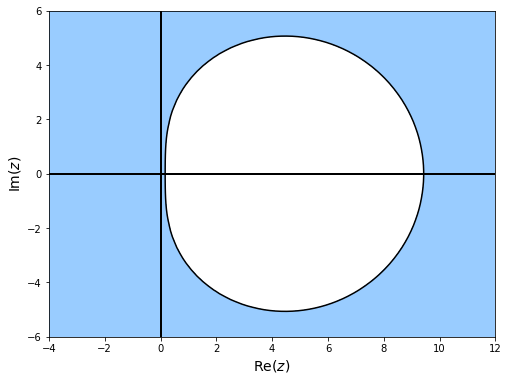

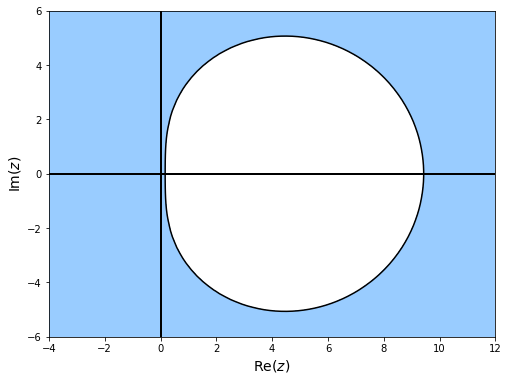

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate z values
X, Y = np.meshgrid(np.linspace(-20, 20, 200), np.linspace(-20, 20, 200))
Z = X + Y * 1j

# Define stability function
Rz = (48 + 16 * Z + 3 * Z ** 2) / (56 - 32 * Z + 8 * Z ** 2)

# Plot stability region
fig = plt.figure(figsize=(8, 6))
plt.contourf(X, Y, abs(Rz), levels=[0, 1], colors="#99ccff")
plt.contour(X, Y, abs(Rz), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=2)
plt.axvline(0, color="k", linewidth=2)
plt.axis([-4, 12, -6, 6])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.show()

from myst_nb import glue
glue("irk_stability_region_example_plot", fig, display=False)